# Big Data Physics 
## Midterm Assignment
### MERLE Jean-Charles 12224870

https://github.com/jcmerle/BigDataPhysics/blob/main/Midterm/midterm.ipynb

Do not use packages like scipy or sklearn. You can use numpy, pandas and matplotlib only

1. Read california_housing_test.csv and remove rows where median_house_value is equal or 
more than 500000

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
house=pd.read_csv('california_house.csv')
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


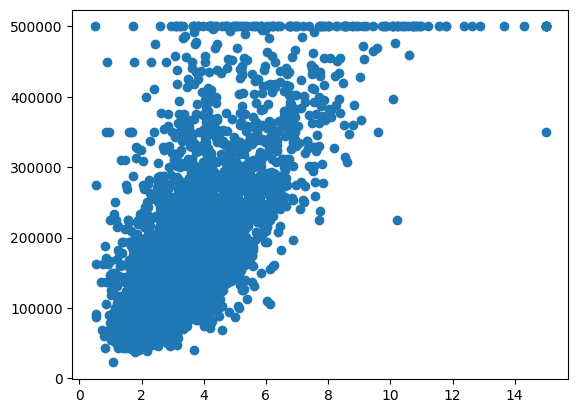

In [57]:
x = house['median_income'] 
y = house['median_house_value']
plt.scatter(x,y)

In [58]:
house=house[house['median_house_value']<500000].reset_index(drop=True)
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2866,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2867,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2868,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2869,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0


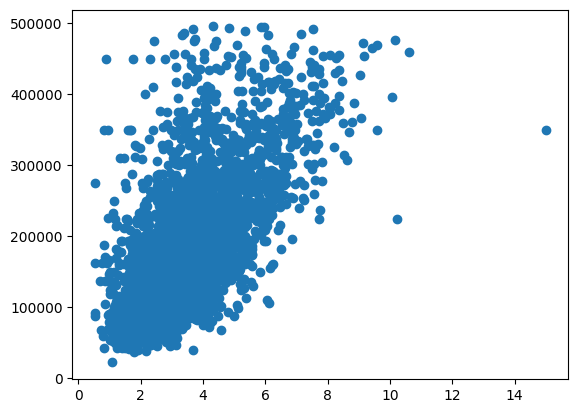

In [59]:
x = house['median_income']
y = house['median_house_value']
plt.scatter(x,y)

2. Obtain 3 variables from the dataframe.\
𝑥1: total_rooms / total_bedrooms\
𝑥2: median_income\
𝑦: median_house_value

In [60]:
x1 = house['total_rooms'] / house['total_bedrooms']
x2 = house['median_income']
y = house['median_house_value']

3. Normalize 3 variables.\
Hint: Subtract the mean value of each variable first and divide by standard deviation.\
Then all variables will have mean value 0 and standard deviation 1

In [61]:
x1_normalized = (x1 - x1.mean()) / x1.std()
x2_normalized = (x2 - x2.mean()) / x2.std()
y_normalized = (y - y.mean()) / y.std()

4. Make a multilinear model\
𝑦_model = a𝑥1 + b𝑥2 + c 

We use the normal equation to find the coefficients 𝑎, 𝑏, 𝑐.

In [62]:
# prepare feature matrix (X) by combining x1 and x2 variables and adding a column of ones for the intercept
X = np.column_stack((x1_normalized, x2_normalized, np.ones(len(x1_normalized))))

In [63]:
# calculate coefficients (a, b) and intercept (c) using the normal equation
params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_normalized)
a, b, c = params

In [64]:
# define the multilinear model
def y_model(x1, x2):
    return a * x1 + b * x2 + c

5. Find optimal parameters (a, b and c) by gradient descent method. 

Initialize the parameters with random values.\
Caltulate the gradient of the cost function with respect to each parameter.\
Update the parameters using the gradient and learning rate.\
Repeat until convergence.

In [65]:
def cost_function(X, y, params):
    m = len(y)
    predictions = X.dot(params)
    return (1/(2*m)) * np.sum(np.square(predictions - y))

def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradient = (1/m) * X.T.dot(X.dot(params) - y)
        params -= learning_rate * gradient
        cost_history.append(cost_function(X, y, params))

    return params, cost_history

# initialize parameters and set learning rate and number of iterations
params = np.random.randn(3)
learning_rate = 0.01
iterations = 1000

# perform gradient descent
optimal_params, cost_history = gradient_descent(X, y_normalized, params, learning_rate, iterations)
a, b, c = optimal_params

def y_model(x1, x2):
    return a * x1 + b * x2 + c

6. Plot two figures\
Fig.1: x1 vs y (scatter plot) and regression line (line plot)\
Fig.2: x2 vs y (scatter plot) and regression line (line plot)

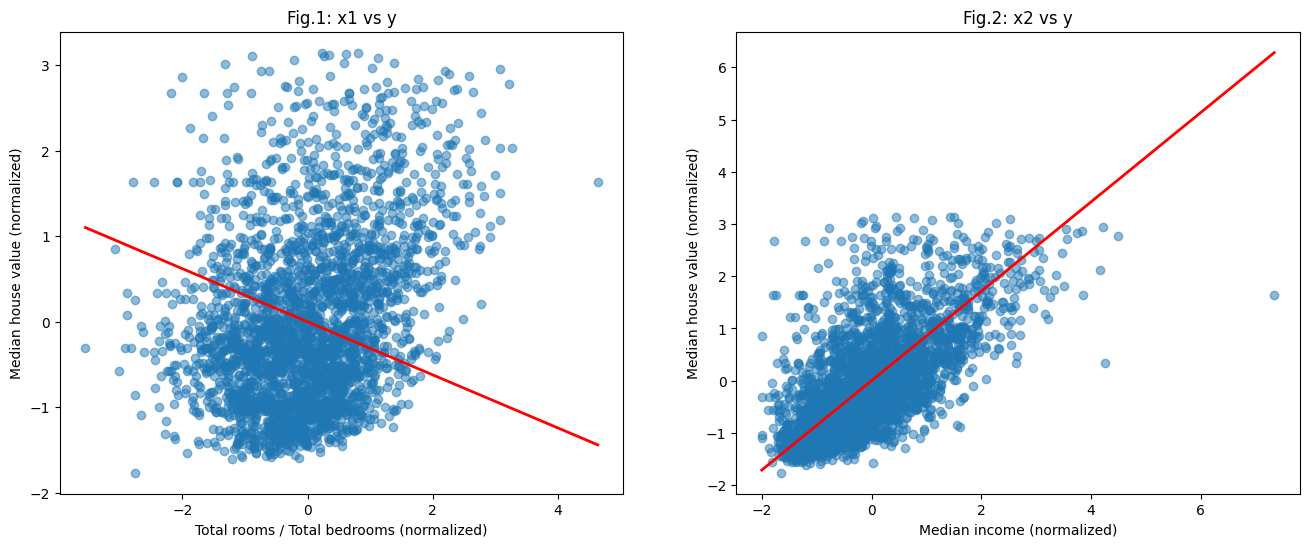

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Fig.1: x1 vs y (scatter plot) and regression line (line plot)
ax1.scatter(x1_normalized, y_normalized, alpha=0.5)
ax1.plot(np.sort(x1_normalized), y_model(np.sort(x1_normalized), np.zeros_like(x1_normalized)), color='red', linewidth=2)
ax1.set_xlabel('Total rooms / Total bedrooms (normalized)')
ax1.set_ylabel('Median house value (normalized)')
ax1.set_title('Fig.1: x1 vs y')

# Fig.2: x2 vs y (scatter plot) and regression line (line plot)
ax2.scatter(x2_normalized, y_normalized, alpha=0.5)
ax2.plot(np.sort(x2_normalized), y_model(np.zeros_like(x2_normalized), np.sort(x2_normalized)), color='red', linewidth=2)
ax2.set_xlabel('Median income (normalized)')
ax2.set_ylabel('Median house value (normalized)')
ax2.set_title('Fig.2: x2 vs y')

plt.show()